In [2]:
using DelimitedFiles
using Plots

# eol

## minimization

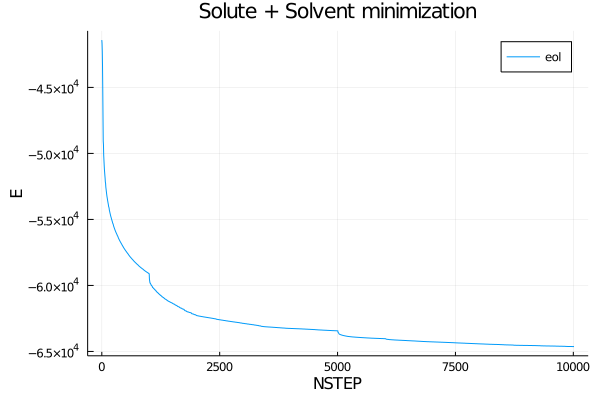

In [3]:
dir_eol_min="/home/pbarletta/labo/20/cph_obp/run/eol/mhe/m"
eol_min_Etot = readdlm("$dir_eol_min/outputs/Etot_min")[:, 2]
eol_mmin_Etot = readdlm("$dir_eol_min/outputs/Etot_mmin")[:, 2]

ntpr = 5
NSTEPS = ntpr * (length(eol_min_Etot) + length(eol_mmin_Etot))
x = collect(0:5:NSTEPS-1)

plot(x, [ eol_min_Etot ; eol_mmin_Etot],
    label = "eol", title = "Solute + Solvent minimization",
    yaxis = "E", xaxis = "NSTEP")

## heat

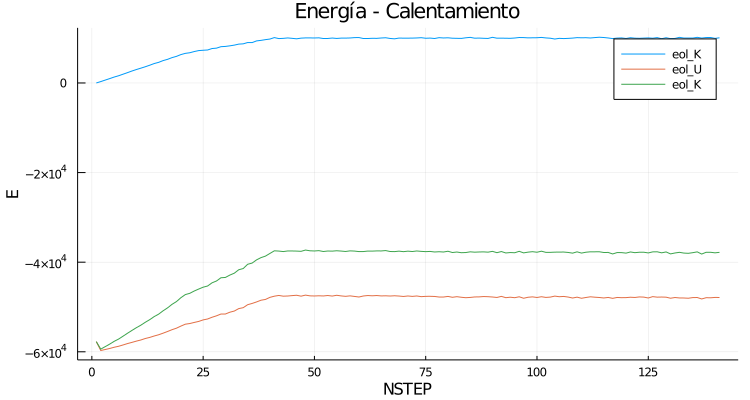

In [4]:
# Energies
dir_eol_hea="/home/pbarletta/labo/20/cph_obp/run/eol/mhe/h"
eol_hea_Ek = readdlm("$dir_eol_hea/outputs/ektot.dat")[:, 2]
eol_hea_Ep = readdlm("$dir_eol_hea/outputs/eptot.dat")[:, 2]
eol_hea_Etot = readdlm("$dir_eol_hea/outputs/etot.dat")[:, 2]

plot(eol_hea_Ek,
    label = "eol_K", title = "Energía - Calentamiento", size = (750, 400),
    yaxis = "E", xaxis = "NSTEP")
plot!(eol_hea_Ep, label = "eol_U")
plot!(eol_hea_Etot, label = "eol_K")

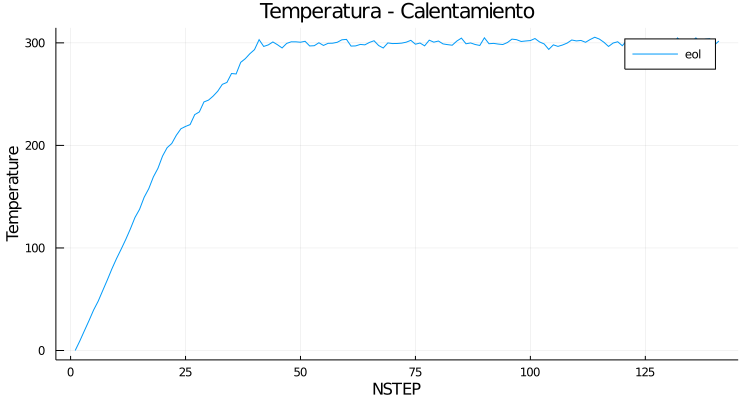

In [5]:
eol_hea_T = readdlm("$dir_eol_hea/outputs/temp.dat")[:, 2]

plot(eol_hea_T,
    label = "eol", title = "Temperatura - Calentamiento", size = (750, 400),
    yaxis = "Temperature", xaxis = "NSTEP")

## equilibration

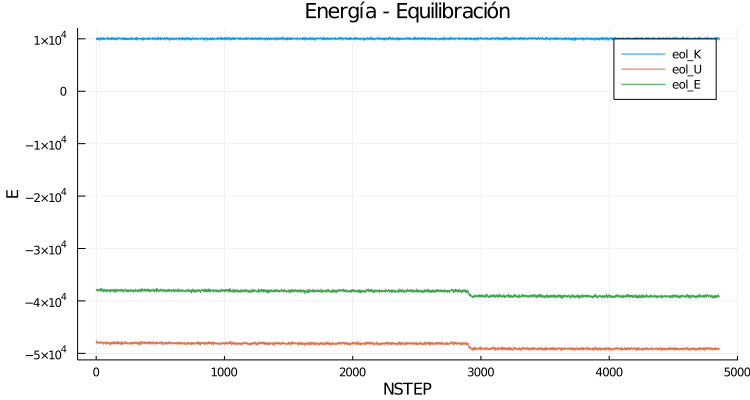

In [6]:
# Energies
dir_eol_equ="/home/pbarletta/labo/20/cph_obp/run/eol/mhe/e"
eol_equ_Ek = readdlm("$dir_eol_equ/outputs/ektot.dat")[:, 2]
eol_equ_Ep = readdlm("$dir_eol_equ/outputs/eptot.dat")[:, 2]
eol_equ_Etot = readdlm("$dir_eol_equ/outputs/etot.dat")[:, 2]

plot(eol_equ_Ek,
    label = "eol_K", title = "Energía - Equilibración", size = (750, 400),
    yaxis = "E", xaxis = "NSTEP")
plot!(eol_equ_Ep, label = "eol_U")
plot!(eol_equ_Etot, label = "eol_E")

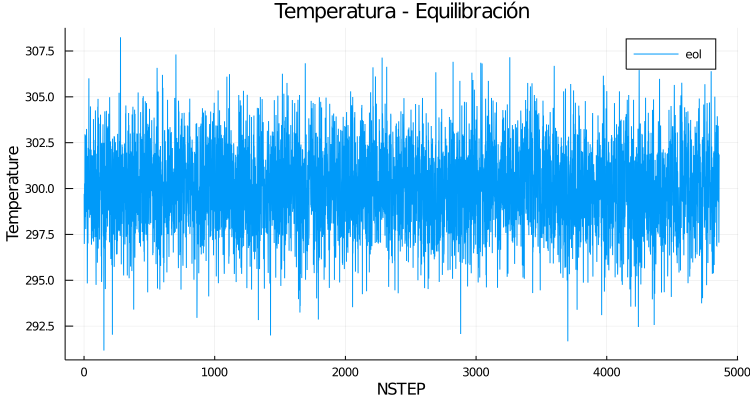

In [7]:
# Temperature
eol_equ_T = readdlm("$dir_eol_equ/outputs/temp.dat")[:, 2]

plot(eol_equ_T,
    label = "eol", title = "Temperatura - Equilibración", size = (750, 400),
    yaxis = "Temperature", xaxis = "NSTEP")

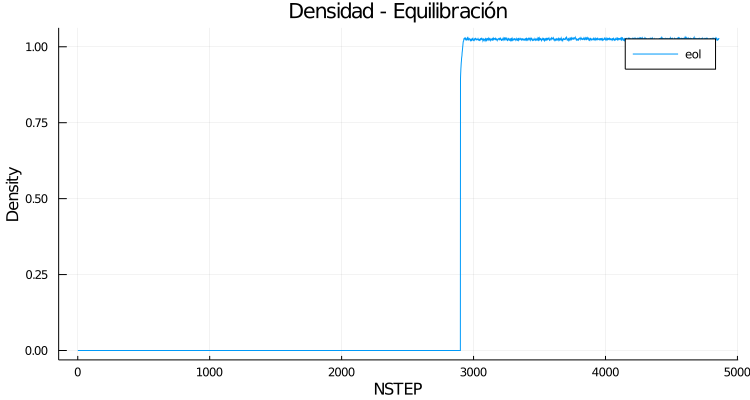

In [8]:
# Density
lb3_equ_dens = readdlm("$dir_eol_equ/outputs/density.dat")[:, 2]
# Only last part was ran at Pr=cte.
lb3_equ_dens[lb3_equ_dens .== ""] .= 0.0
lb3_equ_dens = convert(Array{Float64, 1}, lb3_equ_dens)

plot(lb3_equ_dens,
    label = "eol", title = "Densidad - Equilibración", size = (750, 400),
    yaxis = "Density", xaxis = "NSTEP")

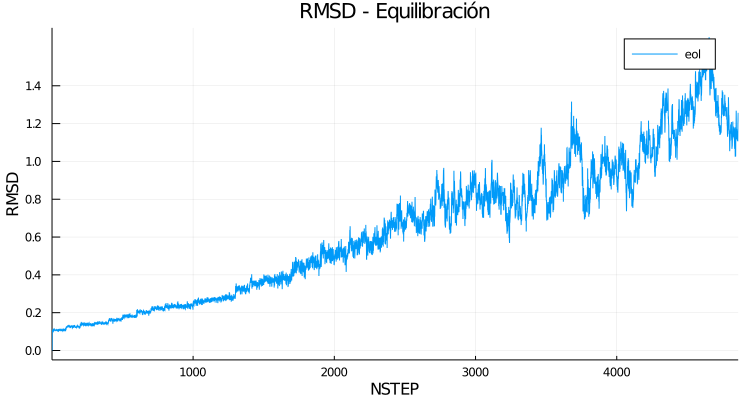

In [10]:
# RMSD ntwx=500
eol_equ_rmsd = readdlm("$dir_eol_equ/rmsd_equ_eol")[2:end, 2]

plot(eol_equ_rmsd,
    xlims = (1, length(eol_equ_rmsd)), xticks = 0:1E3:length(eol_equ_rmsd), yticks = 0:.2:1.5,
    label = "eol", title = "RMSD - Equilibración", size = (750, 400),
    yaxis = "RMSD", xaxis = "NSTEP")